In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import numpy as np
from  IPython.display import  Image

sns.set_style("darkgrid")
sns.set_context("paper")



In [30]:
REAL_PROB = 0.3

In [31]:
sample = np.random.choice([0, 1], size=1000, p=[1-REAL_PROB, REAL_PROB])

In [32]:
a = [0]
b = [0]
probs = []

for i in range(1, 1000):
    a.append(a[i-1] + sample[i])
    b.append(b[i-1] + 1)
    probs.append(a[i] / b[i])

In [33]:
c = ['green' if x else 'red' for x in sample]

In [ ]:
fig, ax = plt.subplots();
fig.set_size_inches(3, 5);
x = [0, 1]
y = [0.5, 0.5]

markerline, stemlines, baseline = ax.stem(x, np.cos(x), '-.');
ax.set_xticks([0, 1]);

def update(i):
    ax.cla();
    p = probs[i];
    markerline, stemlines, baseline = ax.stem([0, 1], [1-p, p], '-.');
    ax.set_ylim((0, 1));
    ax.set_xticks([0, 1]);
    ax.set_title(f'Bernoulli Distribution ({p:.2f})'.format(i));
    
anim = FuncAnimation(fig, update, frames=range(10, 110, 5), interval=500);
anim.save('./out/bern.gif', fps=4, writer='imagemagick');
plt.close()

In [23]:
Image(url='./out/bern.gif')

In [56]:
probs = np.array(probs)
var = probs*(1-probs)

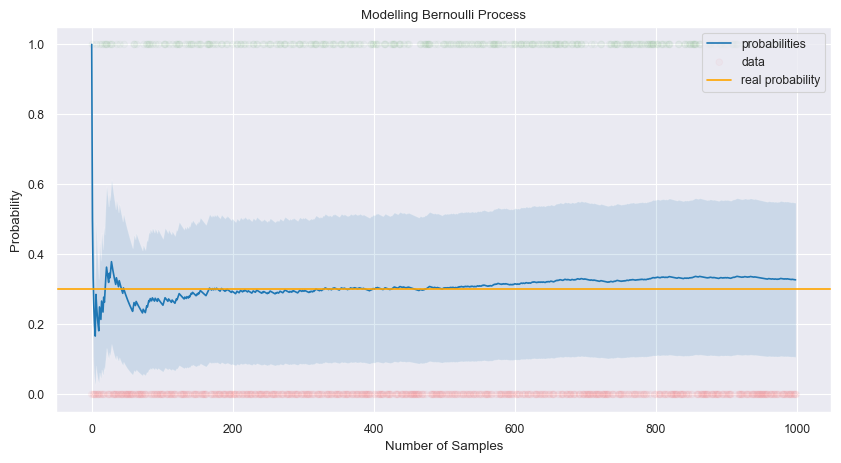

In [64]:
fig = plt.figure(figsize=(10, 5));
plt.plot( probs, label='probabilities');
plt.fill_between(np.arange(len(probs)), probs+var, probs-var, alpha=0.15);
plt.scatter(np.arange(len(sample)), sample, linestyle='None', marker='o', alpha=0.025, color=c, label='data');
plt.axhline(REAL_PROB, color='orange', linestyle='-', label='real probability', alpha=1);
plt.legend(loc='upper right');
plt.title('Modelling Bernoulli Process');
plt.xlabel('Number of Samples');
plt.ylabel('Probability');
plt.show()